<a href="https://colab.research.google.com/github/yohni/Algorithms/blob/master/Backpropagation_Iris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from random import seed
from random import random
import math as mt
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def init_net(n_inputs,n_hiddens,n_outputs):
  net = list()
  hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hiddens) ]
  net.append(hidden_layer)
  output_layer = [{'weights':[random() for i in range(n_hiddens + 1)]} for i in range(n_outputs)]
  net.append(output_layer)
  return net

In [0]:
def activate(weights, inputs):
#   bias in index -1
  activation = weights[-1] 
  for i in range(len(weights)-1):
    activation += weights[i] * inputs[i]
  return activation


In [0]:
# transfer neuron or sigmoid
def transfer(activation):
  return 1.0/(1.0 + mt.exp(-activation))

In [0]:
# Forward
def forward_propagate(net,row):
  inputs = row
  for layer in net:
    new_inputs = []
    for neuron in layer:
      activation = activate(neuron['weights'],inputs)
      neuron['output'] = transfer(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs


In [0]:
def transfer_derivative(output):
  return output * (1.0 - output)

In [0]:
def backward_propagate_error(net,expected):
  for i in reversed(range(len(net))):
    layer = net[i]
    errors = list()
    if i !=len(net)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in net[i+1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [0]:
def update_weights(net,row,l_rate):
  for i in range(len(net)):
    inputs = row[:4]
    if i != 0:
      inputs = [neuron['output'] for neuron in net[i-1]]
    for neuron in net[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']
      
    

In [0]:
def train_net(net, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(net, row)
      expected = [0 for i in range(n_outputs)]
      expected[row[-1]] = 1
      sum_error += sum([(expected[i])**2 for i in range(len(expected))])
      backward_propagate_error(net,expected)
      update_weight(net,row,l_rate)
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
      
   

In [0]:
def predict(outputs):
  res_pred = list()
  for i in outputs:
    if i>0.5:
      res_pred.append(1)
    else:
      res_pred.append(0)
  return res_pred
    
  

In [0]:
idx = ['x1','x2','x3','x4','Type']
dataframe = pd.read_csv('iris.csv', names=idx)

dataframe.head(150)
dataset = dataframe.head(150).values.tolist()

for i in dataset:
	if(i[4]=='Iris-setosa'):
		i.append(0)
		i.append(0)
	elif(i[4]=='Iris-versicolor'):
		i.append(1)
		i.append(0)
	else:
		i.append(0)
		i.append(1)
    
    
# np.random.shuffle(dataset)

# data_train = dataset[:120]
# data_val = dataset[120:]

data_train = dataset[:40]+dataset[50:90]+dataset[100:140]
data_val = dataset[40:50]+dataset[90:100]+dataset[140:150]


In [0]:
n_epoch = 400
network = init_net(4,4,2)
l_rate = 0.1

sum_error_ep_train = list()
sum_acc_ep_train = list()
sum_error_ep_val = list()
sum_acc_ep_val = list()
for epoch in range(n_epoch):
  sum_error = 0
  sum_acc = 0
  for row in data_train:
    outputs = forward_propagate(network,row)
    expected = [0 for ex in range(2)]
    expected[0] = row[-2]
    expected[1] = row[-1]
    sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
    if(expected == predict(outputs)):
      sum_acc += 1
    backward_propagate_error(network,expected)
    update_weights(network, row, l_rate)
    
  
  sum_error_ep_train.append(sum_error/120)  
  sum_acc_ep_train.append(sum_acc/120)
  
  sum_error = 0
  sum_acc = 0
  for row in data_train:
    outputs = forward_propagate(network,row)
    expected = [0 for ex in range(2)]
    expected[0] = row[-2]
    expected[1] = row[-1]
    sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
    if(expected == predict(outputs)):
      sum_acc += 1
    backward_propagate_error(network,expected)
    update_weights(network, row, l_rate)
    
  
  sum_error_ep_val.append(sum_error/120)  
  sum_acc_ep_val.append(sum_acc/120)
  
  
  
  

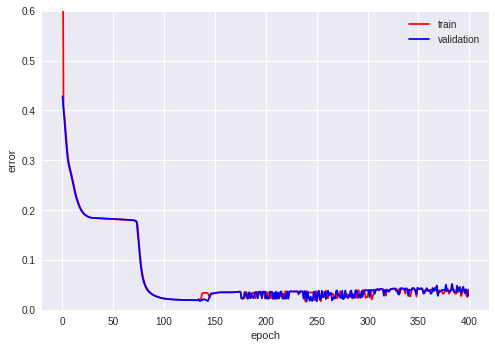

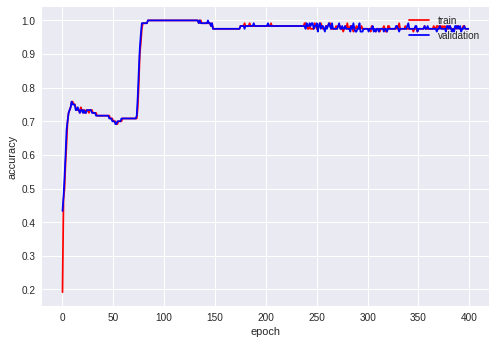

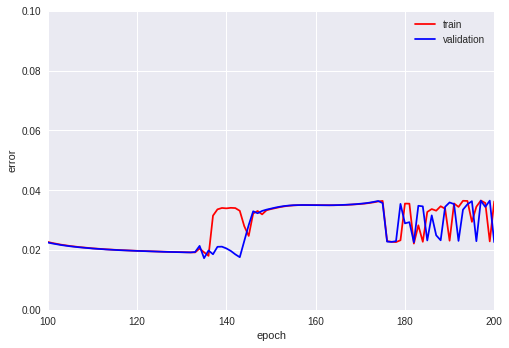

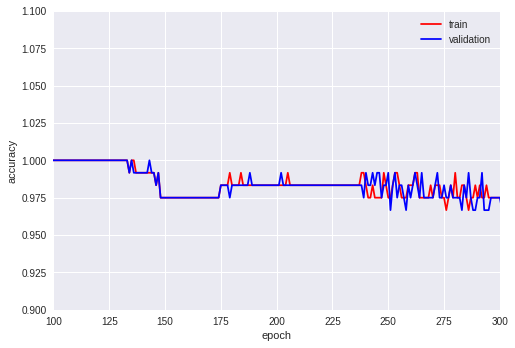

In [415]:
plt.figure(1)
plt.plot(sum_error_ep_train,'r-', label='train')
plt.plot(sum_error_ep_val,'b-', label='validation')
plt.xlabel('epoch')
plt.ylabel('error')
plt.ylim(0,0.6)
plt.legend(loc='upper right')

plt.figure(2)
plt.plot(sum_acc_ep_train,'r-', label='train')
plt.plot(sum_acc_ep_val,'b-', label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper right')

plt.figure(3)
plt.plot(sum_error_ep_train,'r-', label='train')
plt.plot(sum_error_ep_val,'b-', label='validation')
plt.xlabel('epoch')
plt.ylabel('error')
plt.ylim(0,0.1)
plt.xlim(100,200)
plt.legend(loc='upper right')

plt.figure(4)
plt.plot(sum_acc_ep_train,'r-', label='train')
plt.plot(sum_acc_ep_val,'b-', label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0.9,1.1)
plt.xlim(100,300)
plt.legend(loc='upper right')

plt.show()